In [1]:
# as per Taleb mini-lesson: https://www.youtube.com/watch?v=ncqcFNHmMoc&list=PLMV8UXQuOWKPAIjvnyMN2317LHF3ydvnG&index=7

import numpy as np
from matplotlib import pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stats

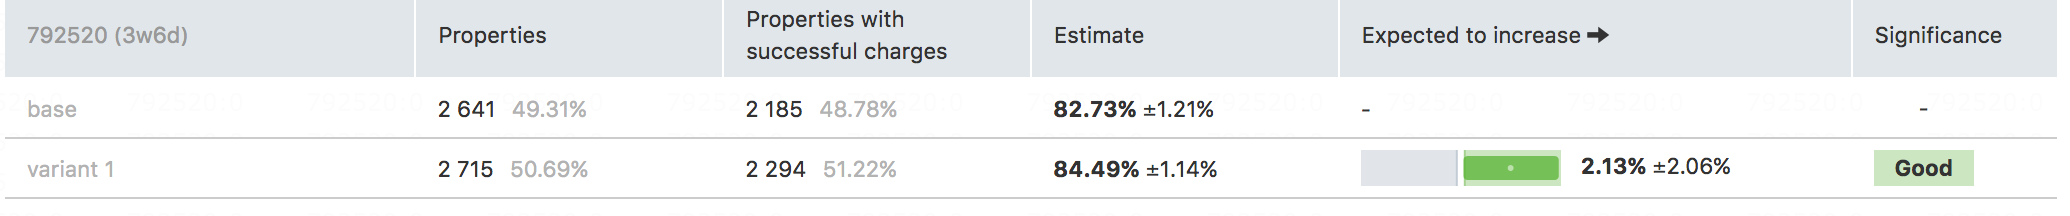

Let's say real treatment effect is just 0.02, how often do we get false-negative p-value for each n?

'0.1738'

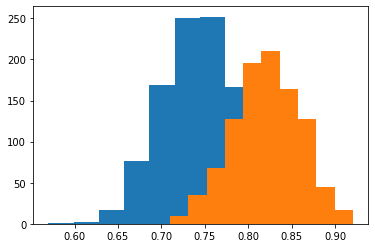

In [321]:
p_a = 0.82
p_b = p_a + 0.02

n = 100
base = np.random.binomial(1, p_a, n)
variant = np.random.binomial(1, p_b, n)

sampling_base = np.random.choice(base, size=(1000, n)).mean(axis=1)
sampling_variant = np.random.choice(variant, size=(1000, n)).mean(axis=1)
plt.hist(sampling_base)
plt.hist(sampling_variant)

"%.4f" % stats.ttest_ind(base, variant).pvalue

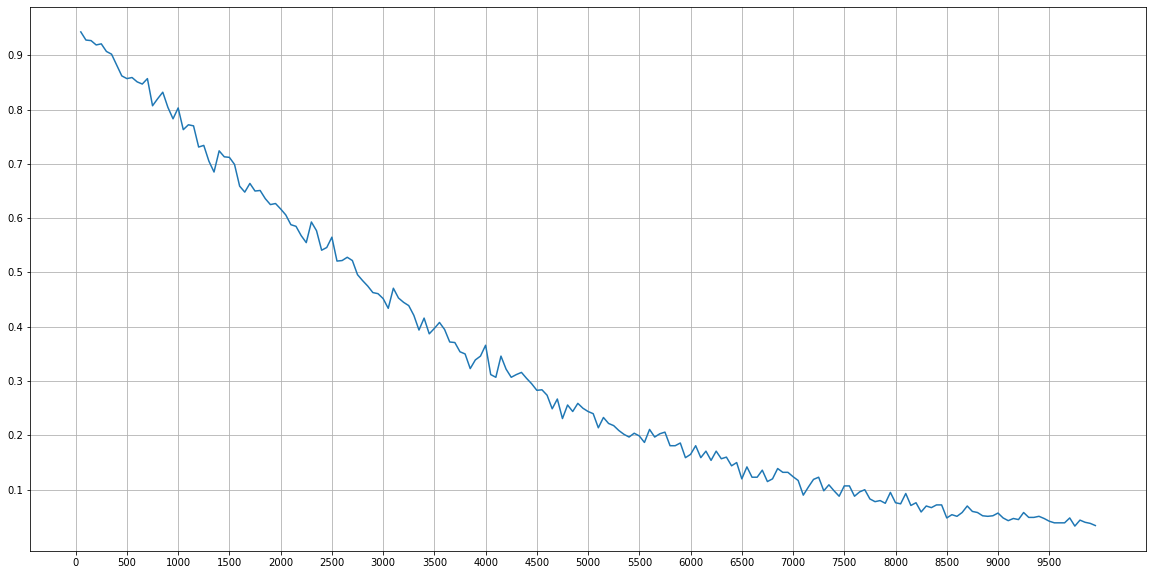

In [353]:
def plot_false_negatives(yticks=(np.array(range(1, 11)) / 10)):
    false_negatives = []
    for n in range(50, 10_000, 50):
        pvalues = []

        simulations = 1000
        for _ in range(0, simulations):
            base = np.random.binomial(1, p_a, n)
            variant = np.random.binomial(1, p_b, n)
            pvalue = stats.ttest_ind(base, variant, equal_var=False).pvalue
            pvalues.append(pvalue)

        false_negatives.append(np.count_nonzero(np.array(pvalues) > 0.05) / simulations)

    plt.figure(figsize=(20,10))
    plt.yticks(yticks)
    plt.xticks(np.array(range(0, 10_000, 500)))
    plt.grid()
    plt.plot(list(range(50, 10_000, 50)), false_negatives)
    
p_a = 0.82
p_b = p_a + 0.02
plot_false_negatives()

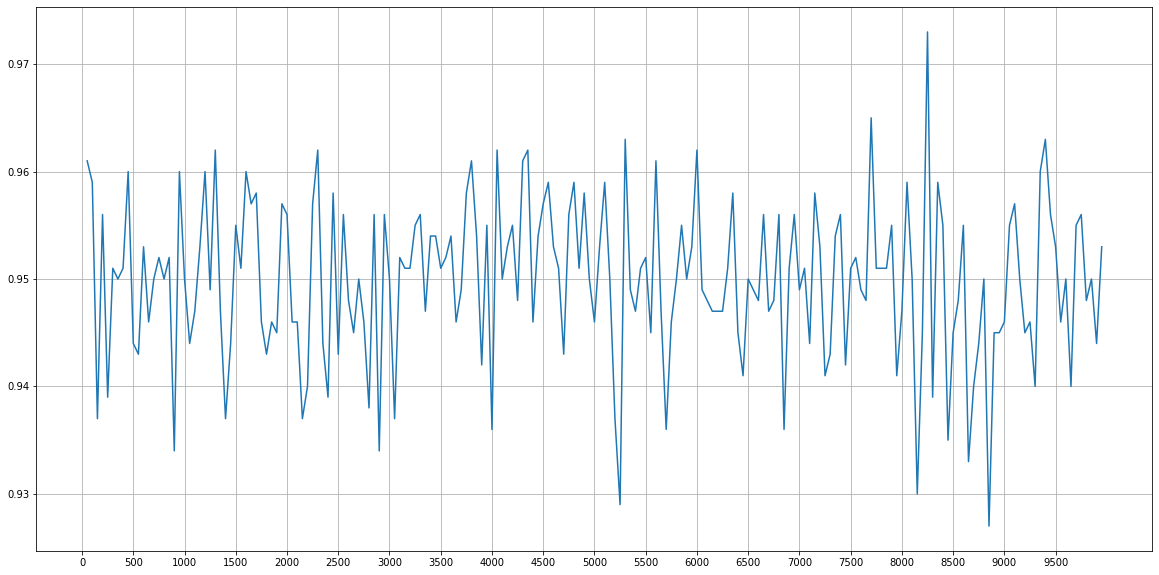

In [354]:
p_a = 0.82
p_b = p_a

plot_false_negatives(yticks=(np.array(range(1, 101)) / 100))

mean: 0.14
amount conclusive (<= 0.05): 0.54%
amount inconclusive (> 0.5): 0.46%


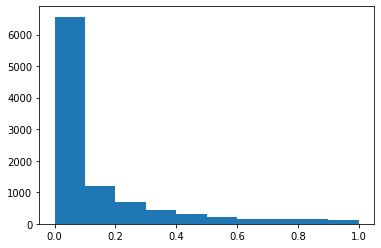

In [358]:
p_a = 0.82
p_b = p_a + 0.02

pvalues = []
n = 3000
for _ in range(0, 10_000):
    base = np.random.binomial(1, p_a, n)
    variant = np.random.binomial(1, p_b, n)
    pvalue = stats.ttest_ind(base, variant, equal_var=False).pvalue
    pvalues.append(pvalue)

plt.hist(pvalues)
print("mean: %.2f" % np.mean(pvalues))
print("amount conclusive (<= 0.05): %.2f%%" % (np.count_nonzero(np.array(pvalues) <= 0.05) / 10_000))
print("amount inconclusive (> 0.5): %.2f%%" % (np.count_nonzero(np.array(pvalues) > 0.05) / 10_000))